In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [67]:
ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

country_names = {"AT": "Áustria",  "BE": "Bélgica",  "CH": "Suíça", "CZ": "Czech Republic", "DE": "Alemanha" , "DK": "Dinamarca", "ES": "Espanha", "FI": "Finlândia", "FR": "França", "GB": "Reino Unido", "GR": "Grécia",  "HU": "Hungria", "IE": "Irlanda", "IL": "Israel", "IT": "Italy", "LU": "Luxemburgo", "NL": "Países Baixos", "NO": "Noruega", "PL": "Polônia", "PT": "Portugal", "SE": "Suécia", "SI": "Eslovênia"}

for key, val in country_names.items():
    ess2002.cntry.loc[ess2002.cntry == key] = val



/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [68]:

display(ess2002.lrscale.head())

0    6.0
1    6.0
2    5.0
3    5.0
4    5.0
Name: lrscale, dtype: float64

In [69]:
ideo = pd.melt(ess2002,id_vars = "cntry",value_vars = "lrscale")
#print(ideo["cntry"].unique())
#print(len(ideo["cntry"].unique()))

ideo = ideo.rename(columns = {"cntry": "país"})
# the scale is from 0 to 10 ! bigger than that are typos or "don't know"
ideo = ideo.loc[(ideo.país != "Italy") & (ideo.país != "Czech Republic")]

non_valid_ideo = ideo.loc[ideo["value"]>10.0]
valid_ideo = ideo.loc[ideo["value"]<=10.0]



In [70]:
total_N = ideo.país.value_counts().rename("total_N")
non_valid_N = non_valid_ideo.país.value_counts().rename("non_valid_N") 
valid_N = valid_ideo.país.value_counts().rename("valid_N")


validity_table = pd.concat([total_N, valid_N, non_valid_N], axis = 1)
validity_table

               total_N  valid_N  non_valid_N
Alemanha          2919     2707          212
Bélgica           1899     1633          266
Dinamarca         1506     1399          107
Eslovênia         1519     1195          324
Espanha           1729     1397          332
Finlândia         2000     1891          109
França            1503     1406           97
Grécia            2566     1983          583
Hungria           1685     1398          287
Irlanda           2046     1695          351
Israel            2499     2301          198
Luxemburgo        1552     1198          354
Noruega           2036     1987           49
Países Baixos     2364     2254          110
Polônia           2110     1757          353
Portugal          1511     1204          307
Reino Unido       2052     1859          193
Suécia            1999     1891          108
Suíça             2040     1881          159
Áustria           2257     1950          307

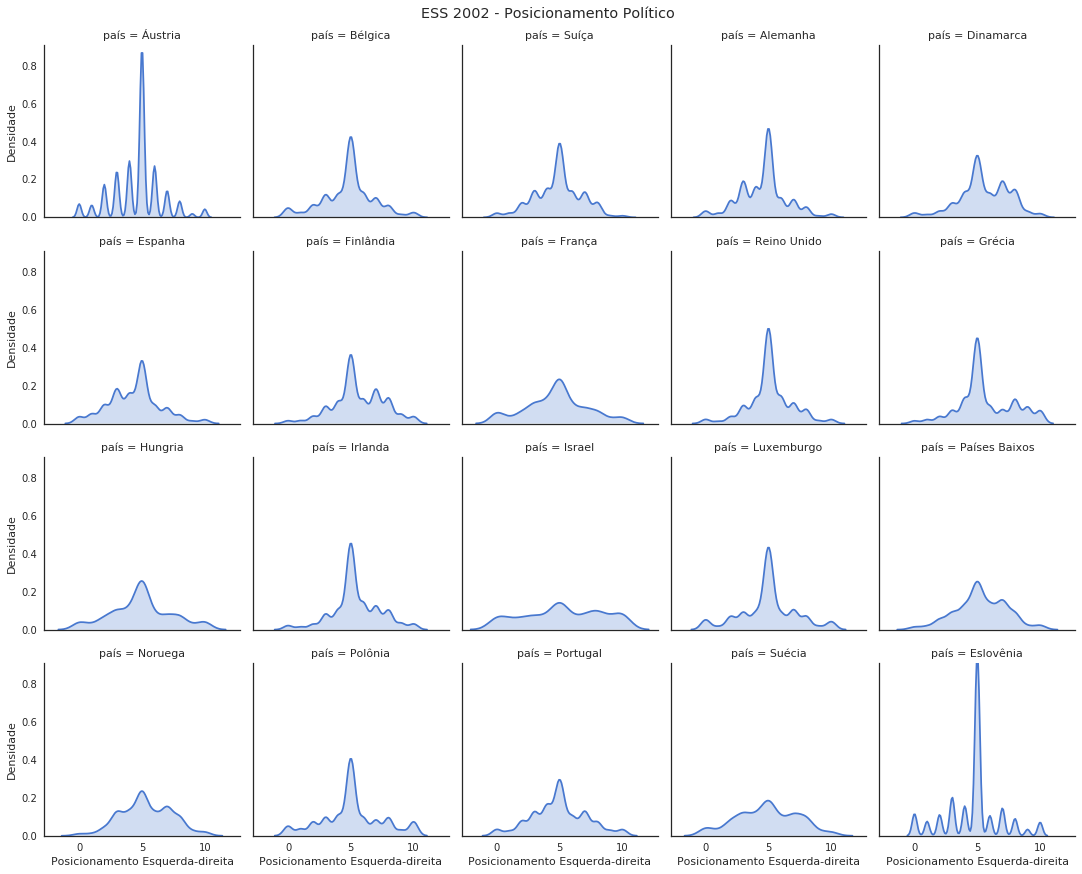

In [71]:
sns.set(style="white", palette="muted", color_codes=True)
g = (sns.FacetGrid(valid_ideo,col = "país", col_wrap = 5)
     .map(sns.distplot, "value",hist = False, kde_kws={"shade": True})
     .set_ylabels("Densidade")
     .set_xlabels("Posicionamento Esquerda-direita"))     

plt.suptitle("ESS 2002 - Posicionamento Político", y = 1.01)
plt.savefig("ess2002plots.pdf",dpi = 200)



In [93]:
#display(ideo)
#print(len(ideo.groupby("cntry").count()))
#ideo.groupby("cntry").count()
#print(len(ess2002.index))
# ideo["cntry"].describe()
#ess2002cntry = dict()
#for i in ideo["cntry"].unique():
#   ess2002cntry[i] = ideo.loc[ideo["cntry"] == i]
# display(ideo)
#ideo.país.describe()
#display(valid_ideo.head())
#display(non_valid_ideo)
#ideo["cntry"].unique()
# print(len(list(ess2002.columns.values)))
#display(ess2002.head())

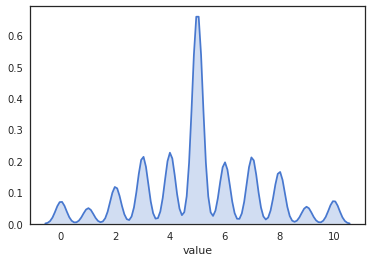

In [42]:
sns.distplot(ideo["value"],hist = False,kde_kws={"shade": True})